In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,confusion_matrix

In [3]:
df=pd.read_csv(r"C:\Users\suman\Desktop\redwine_processed.csv")
df.head()

,fixed acidity;volatile acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfuer dioxide,total sulfuer dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df

,fixed acidity;volatile acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfuer dioxide,total sulfuer dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
X=df.iloc[:,0:11]
y=df.iloc[:,11]

In [7]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [8]:
y1=to_categorical(y)

In [9]:
y1[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y1,test_size=0.2,random_state=1)

In [11]:
ytest.shape[1]

9

### MLP Classifier

In [12]:
mlp=MLPClassifier(hidden_layer_sizes=(150,100,50),activation="relu",max_iter=50)
mlp.fit(xtrain,ytrain)
mlp.score(xtrain,ytrain)

C:\Users\suman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6145426114151681

In [13]:
ypred=mlp.predict(xtest)
multilabel_confusion_matrix(ytest,ypred)

array([[[320,   0],
        [  0,   0]],

       [[320,   0],
        [  0,   0]],

       [[320,   0],
        [  0,   0]],

       [[319,   0],
        [  1,   0]],

       [[307,   0],
        [ 13,   0]],

       [[144,  36],
        [ 44,  96]],

       [[147,  39],
        [ 60,  74]],

       [[278,  12],
        [ 23,   7]],

       [[318,   0],
        [  2,   0]]], dtype=int64)

### Using Keras

In [14]:
model=Sequential()
model.add(Dense(22,input_dim=11,activation='relu'))
model.add(Dense(11,activation="relu"))
model.add(Dense(8,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [15]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
history=model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
40/40 [==============================] - 1s 3ms/step - loss: 2.0583 - accuracy: 0.2955
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 1.7118 - accuracy: 0.4449
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 1.4524 - accuracy: 0.4699
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 1.2996 - accuracy: 0.5066
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 1.1980 - accuracy: 0.5481
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 1.1310 - accuracy: 0.5731
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 1.0887 - accuracy: 0.5825
Epoch 8/20
40/40 [==============================] - 0s 3ms/step - loss: 1.0592 - accuracy: 0.5919
Epoch 9/20
40/40 [==============================] - 0s 2ms/step - loss: 1.0391 - accuracy: 0.5887
Epoch 10/20
40/40 [==============================] - 0s 2ms/step - loss: 1.0200 - accuracy: 0.5966
Epoch 11/20
40/40 [

In [17]:
ypred=model.predict(xtest)

10/10 [==============================] - 0s 2ms/step


In [18]:
_,train_accuracy=model.evaluate(xtrain,ytrain)
print(train_accuracy)

40/40 [==============================] - 0s 2ms/step - loss: 0.9212 - accuracy: 0.6208
0.6207975149154663


In [19]:
_,test_accuracy=model.evaluate(xtest,ytest)
print(test_accuracy)

10/10 [==============================] - 0s 3ms/step - loss: 0.9607 - accuracy: 0.6375
0.637499988079071


In [20]:
predicted=np.argmax(ypred,axis=1)
predicted

array([5, 5, 7, 6, 7, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 5, 6, 5, 5, 5, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 7, 5, 5, 5, 5, 5,
       7, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6,
       5, 6, 5, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6,
       7, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 7, 6, 6, 5,
       7, 5, 6, 6, 5, 7, 5, 5, 5, 5, 6, 5, 6, 7, 5, 5, 6, 6, 5, 7, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       5, 5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 5, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6,
       6, 5, 6, 7, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 7, 5, 5, 6,

In [21]:
actual=np.argmax(ytest,axis=1)
actual

array([5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 5, 7, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 5, 4, 7, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6,
       7, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 7,
       5, 6, 5, 7, 5, 6, 5, 5, 6, 5, 3, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6,
       7, 5, 6, 6, 5, 7, 5, 5, 5, 5, 4, 7, 7, 5, 5, 5, 6, 5, 7, 7, 6, 5,
       7, 5, 6, 7, 5, 7, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6,
       5, 7, 5, 6, 6, 6, 8, 6, 5, 5, 6, 6, 4, 5, 5, 6, 6, 6, 4, 7, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 4, 6, 5, 6, 6, 5, 6, 5, 4, 5,
       6, 5, 7, 5, 7, 5, 7, 6, 5, 5, 6, 5, 5, 7, 5, 6, 5, 6, 5, 5, 7, 6,
       5, 6, 5, 5, 6, 5, 4, 7, 7, 7, 6, 6, 7, 6, 6, 6, 6, 6, 5, 4, 6, 5,
       7, 6, 6, 8, 6, 5, 5, 5, 5, 4, 6, 6, 6, 5, 5, 4, 5, 5, 6, 5, 5, 5,
       4, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 4, 4, 5, 6, 5,
       6, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5, 5, 5, 5, 6,

In [22]:
print(accuracy_score(actual,predicted))

0.6375


In [23]:
print(confusion_matrix(actual,predicted))

[[  0   0   1   0   0   0]
 [  0   0  10   3   0   0]
 [  0   0 114  23   3   0]
 [  0   0  44  80  10   0]
 [  0   0   4  16  10   0]
 [  0   0   0   1   1   0]]


In [24]:
loss_values=history.history['loss']

In [25]:
import matplotlib.pyplot as plt

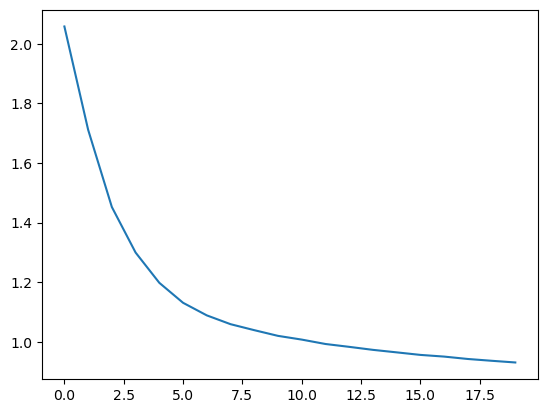

In [26]:
plt.plot(loss_values)
plt.show()